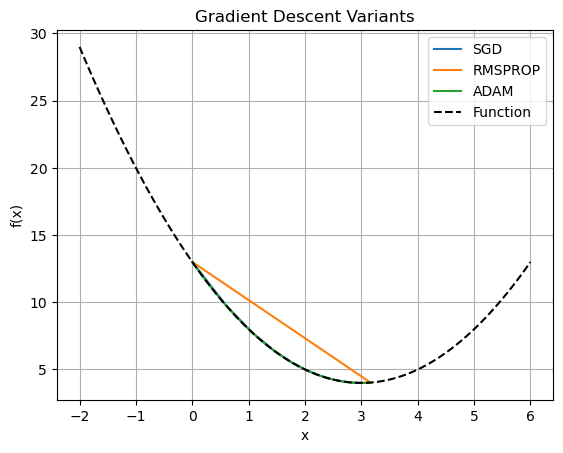

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and its gradient
def f(x): return (x - 3)**2 + 4
def grad_f(x): return 2 * (x - 3)

# Optimization algorithms
def gradient_descent(variant='sgd', lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8, epochs=50):
    x = 0  # initial point
    history = [x]
    m, v = 0, 0
    
    for t in range(1, epochs + 1):
        g = grad_f(x)
        if variant == 'sgd':
            x -= lr * g
        elif variant == 'rmsprop':
            v = beta2 * v + (1 - beta2) * g**2
            x -= lr * g / (np.sqrt(v) + eps)
        elif variant == 'adam':
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * g**2
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            x -= lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(x)
    return history

# Plot convergence
epochs = 50
x_vals = np.linspace(-2, 6, 100)
y_vals = f(x_vals)

for variant in ['sgd', 'rmsprop', 'adam']:
    path = gradient_descent(variant, epochs=epochs)
    plt.plot(path, f(np.array(path)), label=variant.upper())

plt.plot(x_vals, y_vals, 'k--', label='Function')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Gradient Descent Variants')
plt.legend()
plt.grid()
plt.show()


In [1]:
%pip install cvxpy --quiet

import cvxpy as cp

# Define variables
x = cp.Variable()
y = cp.Variable()

# Define objective and constraints
objective = cp.Minimize((x - 2)**2 + (y - 3)**2)
constraints = [x + y >= 4, x >= 0, y >= 0]

# Solve
problem = cp.Problem(objective, constraints)
problem.solve()

print("Optimal value:", problem.value)
print("Optimal x:", x.value)
print("Optimal y:", y.value)


Note: you may need to restart the kernel to use updated packages.
Optimal value: 0.0
Optimal x: 2.0
Optimal y: 3.0


In [2]:
# Print dual variables
for i, constraint in enumerate(constraints):
    print(f"Dual variable for constraint {i + 1}: {constraint.dual_value}")


Dual variable for constraint 1: 0.0
Dual variable for constraint 2: 0.0
Dual variable for constraint 3: 0.0
